In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import face_recognition

In [25]:
#data=pd.DataFrame(columns=['Pictures','histogram','label'])

In [26]:
data=pd.read_json("Sample.json")

In [27]:
data.head()

,Pictures,histogram,label
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[46, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0, 0, ...",Y16CS868
10,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[73, 0, 0, 0, 0, 0, 0, 0, 203, 0, 0, 0, 0, 0,...",Y16CS919
11,"[[255, 255, 221, 128, 255, 255, 255, 255, 193,...","[[69, 0, 0, 0, 0, 0, 0, 0, 107, 0, 0, 0, 0, 0,...",Y16CS863
12,"[[255, 193, 255, 193, 255, 193, 255, 193, 255,...","[[31, 0, 0, 0, 0, 0, 0, 0, 68, 0, 0, 0, 0, 0, ...",Y16CS896
13,"[[255, 255, 255, 255, 255, 255, 127, 255, 255,...","[[178, 0, 0, 0, 0, 0, 0, 0, 176, 0, 0, 0, 0, 0...",Y16CS896


In [28]:
face_cascade = cv2.CascadeClassifier('Haarcascades\haarcascade_frontalface_default.xml')

In [58]:
imgpath = 'Images\sample22.jpg'

In [59]:
img = cv2.imread(imgpath)

In [60]:
img=cv2.resize(img,(1600,2400))

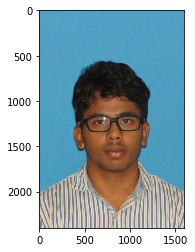

In [61]:
plt.imshow(img[:,:,::-1])
plt.show()

In [63]:
print("enter label : ")
lab="Y16CS863"
print(lab)

enter label : 
Y16CS863


In [64]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
faces = face_cascade.detectMultiScale(img1,scaleFactor = 1.07, minNeighbors=14)
print(faces)

In [66]:
def LBP(a):
    print(a.shape)
    m=a.shape[0]
    n=a.shape[1]
    lbp=np.array([[0 for i in range(n-2)] for j in range(m-2)])
    for i in range(m-2):
        for j in range(n-2):
            pat=''
            ther=a[i+1][j+1]
            if ther>a[i][j]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+2][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            lbp[i][j]=int(pat,2)
    return lbp

In [67]:
def HOG(img):
    grid_x,grid_y=9,9
    print(img.shape)
    m=img.shape[0]//grid_x
    n=img.shape[1]//grid_y
    hist=[]
    for i in range(grid_x-1):
        for j in range(grid_y-1):
            temp=img[j*m:(j+1)*m,i*n:(i+1)*n]
            x=np.reshape(temp,[1,m*n])
            #plt.hist(x[0],bins=256)
            hist1, bin_edges = np.histogram(x,bins=256)
            hist.append(hist1)
    hist=np.array(hist)
    return hist

(2200, 1600)
(2198, 1598)


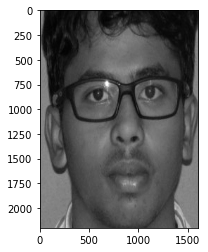

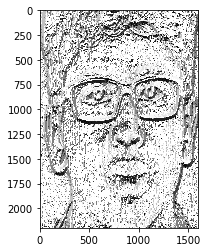

In [68]:
for (x,y,w,h) in faces:
    crop_img = img1[y:y+h, x:x+w]
    crop_img=cv2.resize(crop_img,(1600,2200))
    lbp_img = LBP(crop_img)
    histogram=HOG(lbp_img)
    df1=pd.DataFrame({'Pictures':[lbp_img],'histogram':[histogram],'label':[lab]})
    data=data.append(df1)
    plt.imshow(crop_img,cmap='gray')
    plt.show()
    plt.imshow(lbp_img,cmap='gray')
    plt.show()

In [70]:
data.index = range(1,len(data)+1)

In [72]:
data.head()

,Pictures,histogram,label
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[46, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0, 0, ...",Y16CS868
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[73, 0, 0, 0, 0, 0, 0, 0, 203, 0, 0, 0, 0, 0,...",Y16CS919
3,"[[255, 255, 221, 128, 255, 255, 255, 255, 193,...","[[69, 0, 0, 0, 0, 0, 0, 0, 107, 0, 0, 0, 0, 0,...",Y16CS863
4,"[[255, 193, 255, 193, 255, 193, 255, 193, 255,...","[[31, 0, 0, 0, 0, 0, 0, 0, 68, 0, 0, 0, 0, 0, ...",Y16CS896
5,"[[255, 255, 255, 255, 255, 255, 127, 255, 255,...","[[178, 0, 0, 0, 0, 0, 0, 0, 176, 0, 0, 0, 0, 0...",Y16CS896


# Recognition Image

In [80]:
imgpath = 'Images\sample15.jpg'

In [81]:
rec_img = cv2.imread(imgpath)

In [82]:
gray_img=cv2.resize(rec_img,(1600,2200))

In [83]:
gray_img = cv2.cvtColor(gray_img,cv2.COLOR_BGR2GRAY)

In [87]:
faces = face_cascade.detectMultiScale(gray_img,scaleFactor = 1.05, minNeighbors=14)
print(faces)

[[504 307 805 805]]


(2200, 1600)
(2198, 1598)


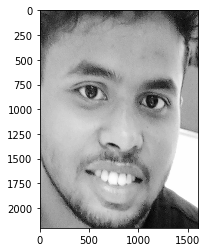

Y16CS868 1692474
Y16CS919 1925036
Y16CS863 1766868
Y16CS896 2038874
Y16CS896 1822600
Y16CS896 1401644
Y16CS896 1778504
Y16CS863 1778712
Y16CS863 1050484
Y16CS863 413344
Y16CS868 2169150
Y16CS863 413344
Y16CS919 2312734
Y16CS919 1013210
Y16CS919 1437490
Y16CS863 1490806
Recognition label :  Y16CS863


In [89]:
for (x,y,w,h) in faces:
    crop_img = gray_img[y:y+h, x:x+w]
    crop_img=cv2.resize(crop_img,(1600,2200))
    lbp_img = LBP(crop_img)
    histogram=HOG(lbp_img)
    hist=np.array(data['histogram'])
    labels=np.array(data['label'])
    plt.imshow(crop_img,cmap='gray')
    plt.show()
    min1=9999999999999
    k=0
    for his in hist:
        dist=0
        for i,j in zip(histogram,his):
            for m,n in zip(i,j):
                dist+=abs(m-n)
        if min1>=dist:
            min1=dist
            label=labels[k]
        print(labels[k],dist)
        k+=1
    print("Recognition label : ",label)